# Day-68: CNNs in Practice with TensorFlow/Keras

We've made massive progress this week! We mastered the CNN building blocks (Day 65) and unlocked the power of Transfer Learning (Day 67) using models like MobileNet!

But here's the thing, I'm telling you: even with transfer learning, if you have a small dataset, your model will still overfit. It'll memorize the training images but fail miserably on unseen data.

So, how do we get more data without spending a cent?

Welcome to Day 68! Today, we master the dark art of artificially increasing our dataset size and making our data machine-ready: Data Augmentation & Image Preprocessing! Let's dive in, guys!

## Topics Covered:
- Image Preprocessing: Normalization

- Data Augmentation: Flipping, Rotation, Cropping, and Zooming

- ImageDataGenerator in Keras

## Image Preprocessing: Normalization (The First Step)

Before any image hits the neural network, it needs to be processed.

- `The Problem`: 
    - Raw pixel values range from 0 to 255. If you feed these large numbers into the network, the loss function values will be massive, causing huge and unstable gradient updates.

- `The Solution`: 
    - Normalization (Rescaling). We scale every pixel value by dividing it by 255.

        $ New Value=Raw Value/255 $

- `Result`: 
    - All pixel inputs now fall into the nice, stable range of 0 to 1. 
    - This ensures the network trains faster and more stably.

## Data Augmentation: The Virtual Photographer

This is the technique we use to fight overfitting by artificially expanding our dataset.

- `Analogy`: **The Student vs. The World.** 
    - Imagine a student memorizes a single picture of a tiger facing left. If you show them a picture of the same tiger facing right, they might fail! Data Augmentation forces the model to learn the essential features of the tiger, regardless of its position, angle, or lighting. We are showing the model that a tiger is a tiger, even if it's mirrored or slightly rotated.

| **Technique** | **Description**                                                              | **Effect**                                                                          | **Keras Parameter**                       |
| :------------ | :--------------------------------------------------------------------------- | :---------------------------------------------------------------------------------- | :---------------------------------------- |
| **Flipping**  | Randomly flips the image horizontally (or vertically, depending on context). | Massive jump in generalization for symmetric objects (e.g., animals).               | `horizontal_flip=True`                    |
| **Rotation**  | Rotates the image by a small, random degree (e.g., 10 or 20 degrees).        | Makes the model robust to slight camera tilts.                                      | `rotation_range=20`                       |
| **Shifting**  | Shifts the image left, right, up, or down.                                   | Ensures the model learns the object's features even if it's not perfectly centered. | `width_shift_range`, `height_shift_range` |
| **Zooming**   | Randomly zooms in or out of the image.                                       | Handles the object being close-up or far away in the frame.                         | `zoom_range`                              |


##  Noise Injection (Advanced)

For high-level performance, sometimes we add random noise or slightly change the brightness/contrast to simulate real-world conditions (like a poor-quality photo). This further prevents the model from memorizing pixel-level details and forces it to focus on higher-level features.

- `Analogy`:
    - Adding random noise is like making your model wear “foggy glasses” — if it still recognizes the object, it’s truly learned the concept!
    - Noise injection improves robustness against lighting or sensor variations.

In [5]:
! pip install matplotlib scipy

     --------------------------------------- 38.7/38.7 MB 46.9 MB/s eta 0:00:00


## Code Example: Implementing Data Augmentation

In TensorFlow/Keras, we use the ImageDataGenerator for both normalization and augmentation. I'm telling you, this is a beautiful one-line solution!

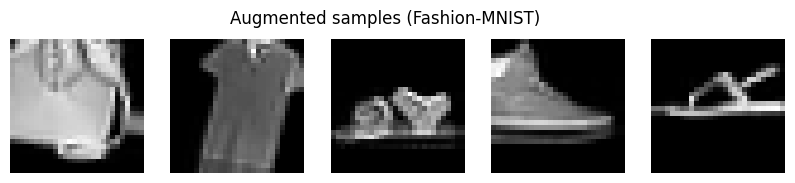

Model: "cnn_fashion_idg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,858 (370.54 KB)

 Trainable params: 94,410 (368.79 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10


c:\Users\amey9\Documents\GitHub\DataScience-100-Days-of-Data-Science\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.7673 - loss: 0.6691 - val_accuracy: 0.1853 - val_loss: 4.9853
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.8357 - loss: 0.4583 - val_accuracy: 0.7620 - val_loss: 0.7053
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.8530 - loss: 0.4084 - val_accuracy: 0.7612 - val_loss: 0.6692
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.8625 - loss: 0.3786 - val_accuracy: 0.8190 - val_loss: 0.5099
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.8715 - loss: 0.3571 - val_accuracy: 0.8328 - val_loss: 0.4838
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.8721 - loss: 0.3494 - val_accuracy: 0.8400 - val_loss: 0.4494
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.8785 - loss: 0.3336 - val_accuracy: 0.8688 - val_loss: 0.3594
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.8797 - loss: 0.3294 - val_accurac

In [6]:
# Day 68 — Data Augmentation & Preprocessing with ImageDataGenerator (Fashion-MNIST)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

# 1) Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2) Add channel dim (grayscale -> (H, W, 1))
x_train = x_train[..., None].astype("float32")
x_test  = x_test[...,  None].astype("float32")

# 3) Train/Val split
val_frac = 0.1
n_val = int(len(x_train) * val_frac)
x_val, y_val = x_train[:n_val], y_train[:n_val]
x_train, y_train = x_train[n_val:], y_train[n_val:]

# 4) ImageDataGenerator — Augment only TRAIN, just rescale for VAL/TEST
train_gen = ImageDataGenerator(
    rescale=1./255,          # Normalization
    horizontal_flip=True,    # Flipping
    rotation_range=12,       # Rotation (~±12°)
    width_shift_range=0.1,   # Shifting (width)
    height_shift_range=0.1,  # Shifting (height)
    zoom_range=0.1           # Zooming (in/out)
    # you can also try: shear_range=0.05, brightness_range=[0.8, 1.2]
)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

batch_size = 128

# 5) Create generators from numpy arrays
train_flow = train_gen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
val_flow   = val_gen.flow(x_val, y_val, batch_size=batch_size, shuffle=False)
test_flow  = test_gen.flow(x_test, y_test, batch_size=batch_size, shuffle=False)

# 6) (Optional) Visualize a few augmented samples
bx, by = next(train_flow)
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(bx[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.suptitle("Augmented samples (Fashion-MNIST)")
plt.show()

# 7) Build a compact CNN
def build_model():
    inputs = keras.Input(shape=(28,28,1))
    x = layers.Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="cnn_fashion_idg")

model = build_model()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

# 8) Train (generators yield augmented batches on-the-fly)
epochs = 10
steps_per_epoch = len(train_flow)
validation_steps = len(val_flow)

history = model.fit(
    train_flow,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_flow,
    validation_steps=validation_steps,
    epochs=epochs,
    verbose=1
)

# 9) Evaluate
test_loss, test_acc = model.evaluate(test_flow, verbose=0)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# 10) Quick predictions preview
preds = model.predict(test_flow, verbose=0)
pred_labels = preds.argmax(axis=1)
print("Preds (first 10): ", pred_labels[:10])
print("True  (first 10): ", y_test[:10])


## Summary of Day 68

Smashing job today, guys! You've learned the final piece of the puzzle to build robust CNNs:

1. Normalization: Scaling pixels from 0-255 to 0-1 for stable training.

2. Data Augmentation: Using techniques like Flipping, Rotation, and Zooming to artificially create diverse data, which is the best defense against overfitting on small datasets.

3. Keras Tool: The ImageDataGenerator handles all of this automatically for us!

## What's Next (Day 69)

We've covered the CNN architecture, the Transfer Learning strategy, and the Data Augmentation method.

Tomorrow, on Day 69, we stop talking and start doing! We will launch into our first major, hands-on CNN project using the Fashion-MNIST dataset! You'll write, train, and evaluate a CNN from scratch, applying all the concepts we've learned this week!